# [GIS<sup>Geospatial Information System</sup>]Geopandas Tutorial
이 내용은 [yg's blog](https://yganalyst.github.io/spatial_analysis/spatial_analysis_1/)를 보고 공부하기 위해 작성한 내용입니다.

# 목차

# GIS<sup>Geospatial Information System</sup>란?
지도를 점<sup>Point</sup>, 선<sup>Line</sup> 또는 영역<sup>Polygon</sup>과 같은 지리 정보 데이터로 변환하여 효율적으로 활용하기 위한 정보 시스템
<img src="https://yganalyst.github.io/assets/images/gis_logo.jpg" alt="GIS" height=50% width=50%>


## GIS Data
지리 정보 데이터는 크게 Vector과 Raster로 나누어 지는데 Raster는 객체들을 이미지 형태의 나타내는 데이터이고, 객체들의 지리적 위치를 방향성, 크기로 나타낸 데이터
<img src="https://t1.daumcdn.net/cfile/blog/2225E44051B96FE51F" height=50% width=50%>

# Geopandas
- Python에서 지리 공간 데이터 작업을 보다 쉽게 수행할 수 있는 오픈 소스 프로젝트
- Pandas가 사용하는 데이터 유형을 확장(`GeoSeries`, `GeoDataFrame`)하여 기하학적 유형에 대한 공간 작업을 지원
- 기하학적 작업은 [shapely](https://shapely.readthedocs.io/en/stable/), 파일 액세스는 [fiona](https://fiona.readthedocs.io/en/latest/), plotting은 [matplotlib](https://matplotlib.org/)에 의존

## Geopandas 설치
Anaconda Prompt
```
conda install -c conda-forge geopandas
```

## 1. 공간 데이터 생성
Geopandas는 `shapely`라는 패키지를 사용하여 기하학적 작업을 진행하는데, 이 패키지에는 세 가지 Vector 타입 이외에 MultiPolygon, MultiLinestring 등이 있다.

In [4]:
import geopandas as gpd
from shapely.geometry import Polygon, LineString, Point

In [5]:
# 4개의 좌표 설정
x1, y1 = 1, 2
x2, y2 = 2, 2
x3, y3 = 2, 3
x4, y4 = 1, 3

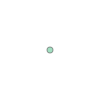

In [6]:
# 점(Point) 만들기
Point([x1, y1])

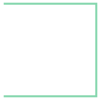

In [7]:
LineString([(x1, y1), (x2, y2), (x3, y3), (x4, y4)])

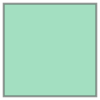

In [8]:
Polygon([(x1, y1), (x2, y2), (x3, y3), (x4, y4)])

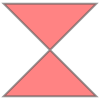

In [9]:
Polygon(([(x1,y1),(x2,y2),(x4,y4),(x3,y3)]))

Polygon의 좌표는 순서가 있으므로 잘못된 순서로 출력한다면 위와 같은 결과가 출력된다.

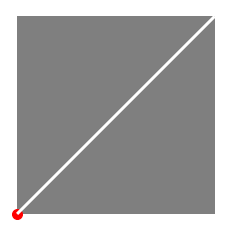

Point
LineString
Polygon


In [10]:
import matplotlib.pyplot as plt

point = Point([x1,y1])
line = LineString([(x1,y1),(x3,y3)])
polygon = Polygon([(x1,y1),(x2,y2),(x3,y3),(x4,y4)])

ax = gpd.GeoSeries(polygon).plot( color='black', alpha=0.5)
gpd.GeoSeries(line).plot(ax=ax, linewidth=3, color='white')
gpd.GeoSeries(point).plot(ax=ax, color='red', markersize=100)
plt.axis('off')
plt.show()
print(point.geom_type)
print(line.geom_type)
print(polygon.geom_type)

# 2. 외부데이터 활용

##  2-1. 공간 데이터의 형태

![data_image](./image/geopandas_001.png)

외부데이터는 [서울 소방서 위치 데이터](./https://github.com/yganalyst/spatial_analysis)와 [서울 행정구역 경계 데이터](./http://data.nsdi.go.kr/dataset/15144)를 활용할 것이다.  
소방서 위치 데이터는 csv파일로 위도 경도 좌표(Point)를 가지고 있고 행정구역 경계 데이터는 shapefile로 GIS 데이터(지리 정보)를 가지고 있다.

> ### shapefile이란?
> `dbf`, `prj`, `shp`, `shx` 이렇게 4가지 중 3가지 이상의 확장자를 가진 파일을 통틀어 shapefile이라고 하며, 한 경로에 있어야 한다.
> - **dbd** : dBase 데이터베이스 파일로, 데이터프레임 형태의 정보를 가지고 있다.
> - **prj** : 공간 데이터의 좌표정보(좌표계)를 가지고 있으며, 좌표 정의가 되어 있지 않을 경우 이 파일이 없을 수 있다.
> - **shp** : vector 타입 데이터의 도형 및 정보를 담고 있다.
> - **shx** : shp와 마찬가지이며, Auto CAD에서 주로 사용된다.

## 2-2. 공간데이터 시각화

In [11]:
import pandas as pd

In [42]:
seoul_area = gpd.GeoDataFrame.from_file('./data/Seoul_area.shp', encoding='cp949')
pt_119 = pd.read_csv('./data/서울시 안전센터관할 위치정보 (좌표계_ WGS1984).csv', encoding='CP949')

In [43]:
seoul_area.head()

,ADM_SECT_C,SGG_NM,SGG_OID,COL_ADM_SE,GID,geometry
0,11740,媛뺣룞援,337,11740,127,"POLYGON ((969713.132 1948846.288, 969692.451 1..."
1,11710,넚뙆援,1969,11710,128,"POLYGON ((968640.372 1944982.492, 968640.957 1..."
2,11680,媛뺣궓援,33,11680,129,"POLYGON ((958696.114 1948605.678, 959195.920 1..."
3,11650,꽌珥덇뎄,33,11650,130,"POLYGON ((958117.753 1940073.855, 958118.398 1..."
4,11620,愿븙援,33,11620,131,"POLYGON ((949321.250 1944035.054, 949323.256 1..."


In [44]:
pt_119.head()

,고유번호,센터ID,센터명,위도,경도
0,21,1121101,양천119안전센터,37.527161,126.869452
1,22,1122101,신내119안전센터,37.610246,127.096473
2,42,1115104,서초119안전센터,37.487773,127.017145
3,3,1106102,이촌119안전센터,37.527841,126.958318
4,4,1106104,후암119안전센터,37.544896,126.981242


shp 파일에는 지리 정보인 Polygon이 있으나 csv 파일의 경우에는 단순한 데이터 프레임이므로 지리 정보가 없다. 따라서 지리 정보를 만들어주어야 한다.

In [45]:
pt_119['경도'] = pt_119['경도'].astype(float)
pt_119['위도'] = pt_119['위도'].astype(float)
pt_119['geometry'] = pt_119.apply(lambda row : Point([row['경도'], row['위도']]), axis=1)
pt_119 = gpd.GeoDataFrame(pt_119, geometry='geometry')

pt_119.head()

,고유번호,센터ID,센터명,위도,경도,geometry
0,21,1121101,양천119안전센터,37.527161,126.869452,POINT (126.86945 37.52716)
1,22,1122101,신내119안전센터,37.610246,127.096473,POINT (127.09647 37.61025)
2,42,1115104,서초119안전센터,37.487773,127.017145,POINT (127.01714 37.48777)
3,3,1106102,이촌119안전센터,37.527841,126.958318,POINT (126.95832 37.52784)
4,4,1106104,후암119안전센터,37.544896,126.981242,POINT (126.98124 37.54490)


## 2-3. 좌표 정의 및 변환

공간 데이터를 다룰 때는 좌표계가 중요하며, 다루는 데이터에 정의된 좌표계를 알아야 변환할 수 있다. 또한 GIS 데이터를 저장할 때에는 좌표계의 이름을 명시해주도록 하자. 

대표적으로 위경도, 미터 좌표계가 있는데 국내에서는 주로 아래의 좌표계를 사용한다.
- EPSG4326(WGS84) : 위경도, 기본좌표계
- EPSG5179(TM) : 미터 좌표계
- EPSG5174(TM) : 미터 좌표계
- EPSG5181(TM) : 미터 좌표계
데이터의 좌표계를 모르면 활용할 수 없다. 따라서, 좌표계를 아는 것은 중요하다.

좌표계 확인 및 정의는 `.crs`인자로, 변환은 `.to_crs` 인자로 가능하다.

In [46]:
print(seoul_area.crs)
print(pt_119.crs)

epsg:5179
None


서울 소방서의 위치 데이터는 아직 좌표 정의가 되어있지않다.  
파일명에 기본 좌표계로 명시되어 있으므로 다음과 같이 정의해주자.

In [47]:
pt_119.crs = {'init':'epsg:4326'}
print(pt_119.crs)

+init=epsg:4326 +type=crs


C:\Users\bauser01\Anaconda3\lib\site-packages\pyproj\crs\crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


두 데이터의 좌표계가 다르면 같이 처리할 수 없으므로,  
같은 좌표계로 변경해주자.

In [48]:
pt_119 = pt_119.to_crs({'init':'epsg:5179'})

두 데이터를 모두 시각화

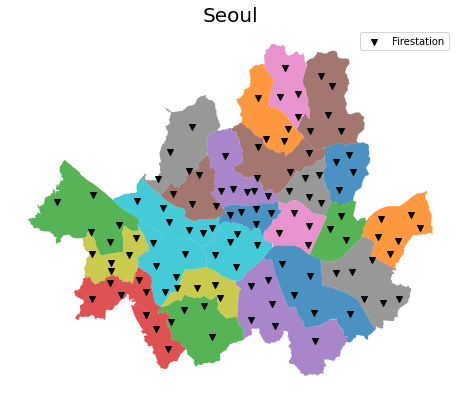

In [49]:
ax = seoul_area.plot(column="SGG_NM", figsize=(8,8), alpha=0.8)
pt_119.plot(ax=ax, marker='v', color='black', label='Firestation')
ax.set_title("Seoul", fontsize=20)
ax.set_axis_off()
plt.legend()
plt.show()

확인 결과,  서울 지도 데이터의 서초구 데이터가 잘못되어 있다.  
해당 데이터는 [QGIS](../QGIS/qgis_tutorial.md)를 통해 해결해주자.

# 3. 공간 정보 데이터 처리

## 3-1. 객체 속성
   1. `area` : 면적 계산
   2. `length` : 길이 계산
   3. `boundary` : 테두리(LineString 객체)
   4. `exterior` : 테두리(LineRing 객체)
   5. `centroid` : 무게중심점
   6. `xy` : Point 객체 좌표 반환
   7. `coords` : LinString 객체 좌표 반환
   8. `is_valid` : 도형 유효성 검사(boolean)
   9. `geom_type` : 공간 객체 타입